In [3]:
# Import the Pandas and random libraries
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt

# Read the .csv file from the "files" section of Google Colab
df = pd.read_csv("socialtracker.csv")





In [33]:
df.head()

,from,to
1,Virat Kohli,Bruno Mars
2,Jimmy Fallon,Wiz Khalifa
4,Shakira,Shakira
5,Justin Timberlake,PMO India
6,Jimmy Fallon,Kylie Jenner


In [34]:
# This will create a new DataFrame where each row represents a user-follows pair. For example:
pairs_df = pd.melt(df, id_vars=['from'], value_vars=['to'])
pairs_df = pairs_df.groupby(['from', 'value'])['value'].count().reset_index(name='count')

In [35]:

users = df['from'].unique().tolist() + df['to'].unique().tolist()
users = list(set(users))

In [39]:
# Create the adjacency matrix
adj_matrix = pd.crosstab(df['from'], df['to'])

# Print the adjacency matrix
print(adj_matrix)

to                  Akshay Kumar  Amitabh Bachchan  BBC Breaking News  \
from                                                                    
BBC Breaking News              1                 0                  0   
Barack Obama                   0                 0                  0   
Bill Gates                     0                 0                  1   
Britney Spears 🌹🚀              0                 1                  1   
CNN Breaking News              0                 0                  0   
Cristiano Ronaldo              1                 0                  0   
Demi Lovato                    0                 1                  0   
Ellen DeGeneres                1                 1                  1   
Elon Musk                      0                 0                  0   
Jimmy Fallon                   0                 2                  0   
Justin Bieber                  1                 0                  0   
Justin Timberlake              0                 0 

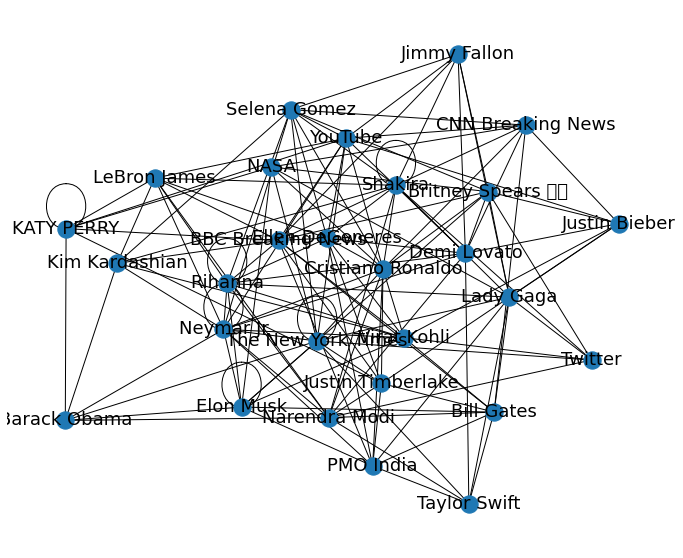

In [58]:

# Create the main network plot
G = nx.from_pandas_adjacency(adj_matrix)

# Set the plot size and create the Figure and Axes objects
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the plot
nx.draw(G, with_labels=True, font_size=18, edge_color="black", ax=ax)  # specify the font size and edge color


plt.show()


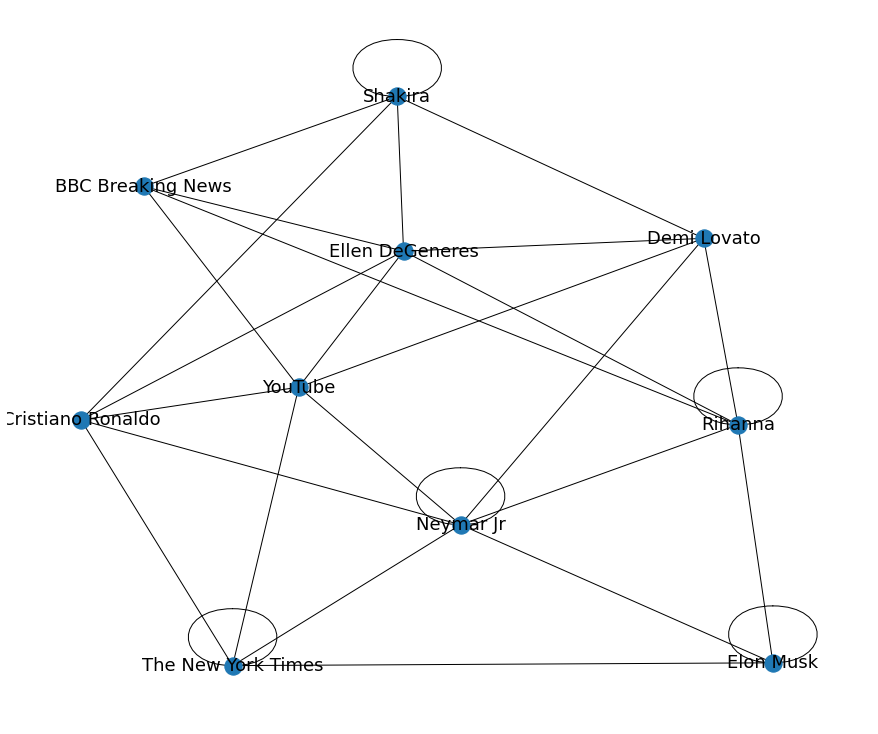

In [59]:
# Create a top 10 twitter users plot
G = nx.from_pandas_adjacency(adj_matrix)

# Calculate the degree of each node
degrees = dict(nx.degree(G))

# Sort the nodes by their degree
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

# Select the top 10 nodes with the highest degree
top_10_nodes = sorted_nodes[:10]

# Create the subgraph containing only the top 10 nodes
subgraph = G.subgraph(top_10_nodes)

# Set the plot size and background color
plt.figure(figsize=(12, 10), facecolor='#333333')

# Draw the subgraph
nx.draw(subgraph, with_labels=True, font_size=18, edge_color="black")  # specify the font size and edge color
plt.show()